In [1]:
#Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
import warnings
warnings.filterwarnings('ignore')

In [3]:
# column names

In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [5]:
# Read the csv file

In [6]:
data=pd.read_csv("D:/housing.csv",names=column_names,header=None, delimiter=r"\s+")

In [7]:
# see the top 5 rows

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
# shape of the data

In [10]:
data.shape

(506, 14)

In [11]:
# See the description of data

In [12]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
# See the null values

In [14]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [15]:
# import stats model

In [16]:
import statsmodels.api as sm

In [17]:
# qq plot for medv

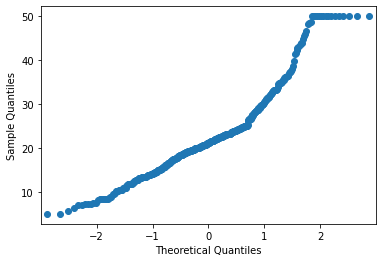

In [18]:
fig=sm.qqplot(data["MEDV"])

In [19]:
# distribution plot for medv

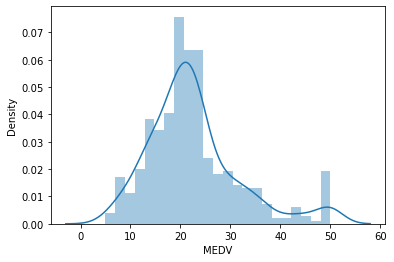

In [20]:
sns.distplot(data["MEDV"])
plt.show()

In [21]:
# heatmap of correaltions between features

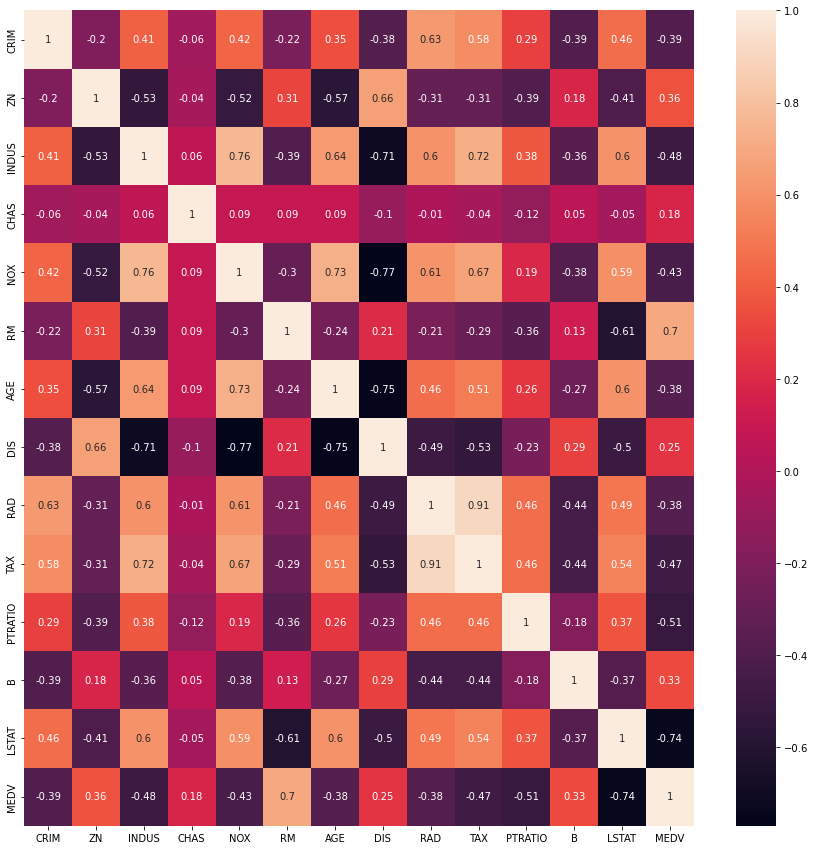

In [22]:
plt.figure(figsize=(15,15))
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [23]:
# we have to see outliers in medv
# we use boxplot for outlier detection

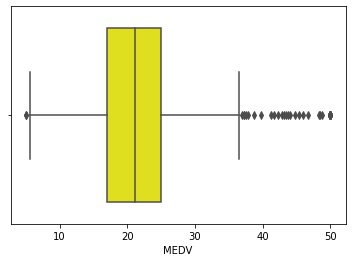

In [24]:
sns.boxplot(x=data['MEDV'],color="yellow")
plt.show()

In [25]:
#outliers treatment

In [26]:
MEDV25 = data['MEDV'].quantile(0.25)
MEDV75 = data['MEDV'].quantile(0.75)
iqr = MEDV75 - MEDV25
MEDV25, MEDV75, iqr

(17.025, 25.0, 7.975000000000001)

In [27]:
upper_limit = MEDV75 + 1.5 * iqr
lower_limit = MEDV25 - 1.5 * iqr
upper_limit, lower_limit

(36.962500000000006, 5.0624999999999964)

In [28]:
data[data['MEDV'] > upper_limit]
data[data['MEDV'] < lower_limit]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666.0,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666.0,20.2,384.97,22.98,5.0


In [29]:
filter1 = data['MEDV'] < upper_limit
filter2 = data['MEDV']  > lower_limit
data.drop(data[filter1 & filter2].index, inplace = True)

In [30]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276.0,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0,0.4450,7.820,36.9,3.4952,2,276.0,18.0,393.53,3.57,43.8
157,1.22358,0.0,19.58,0,0.6050,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403.0,14.7,369.30,3.70,50.0
179,0.05780,0.0,2.46,0,0.4880,6.980,58.4,2.8290,3,193.0,17.8,396.90,5.04,37.2
180,0.06588,0.0,2.46,0,0.4880,7.765,83.3,2.7410,3,193.0,17.8,395.56,7.56,39.8
182,0.09103,0.0,2.46,0,0.4880,7.155,92.2,2.7006,3,193.0,17.8,394.12,4.82,37.9


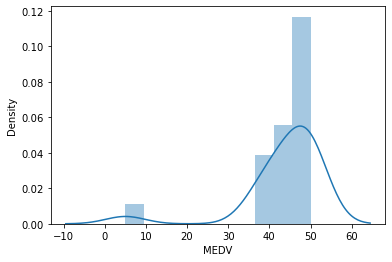

In [31]:
sns.distplot(data["MEDV"])
plt.show()

In [32]:
# spliting data in x & y
X=data.drop('MEDV',axis=1)
y=data['MEDV']

In [33]:
# feature scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [36]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [37]:
from sklearn.metrics import r2_score,mean_squared_error,f1_score, classification_report

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV 

In [39]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [40]:
# making predictions on the testing set
y_lasso_pred = lasso.predict(X_test)

In [41]:
print("lasso model rmse_score:",np.sqrt(mean_squared_error(y_test,y_lasso_pred)))
print("lasso model r2_score:", r2_score(y_test,y_lasso_pred))
print("lasso model accuracy(in %):", lasso.score(X_test,y_test)*100)

lasso model rmse_score: 7.260585882578913
lasso model r2_score: 0.6398735682651674
lasso model accuracy(in %): 63.98735682651674


In [42]:
scores_lasso = cross_val_score(lasso, X, y, cv=KFold(n_splits=10),scoring='neg_mean_absolute_error')
scores_lasso.mean()

-5.793866848710175

In [43]:
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
lasso_reg = GridSearchCV(lasso, grid, scoring='neg_mean_absolute_error', cv=KFold(n_splits=10), n_jobs=-1)

In [44]:
results = lasso_reg.fit(X, y)

In [45]:
print('MAE: %.3f' % results.best_score_)

MAE: -5.191


In [46]:
print('Config: %s' % results.best_params_)
print(results.best_estimator_)

Config: {'alpha': 0.04}
Lasso(alpha=0.04)


In [47]:
sv_lasso = cross_val_score(Lasso(alpha=0.04), X, y, cv=KFold(n_splits=10),scoring='neg_mean_absolute_error')
sv_lasso.mean()

-5.1911470671652085

In [48]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [49]:
# making predictions on the testing set
y_ridge_pred = ridge.predict(X_test)

In [50]:
print("Ridge model rmse_score:",np.sqrt(mean_squared_error(y_test,y_ridge_pred)))
print("Ridge model r2_score:", r2_score(y_test,y_ridge_pred))
print("Ridge model accuracy(in %):", ridge.score(X_test,y_test)*100)

Ridge model rmse_score: 6.967377028771655
Ridge model r2_score: 0.6683726894966797
Ridge model accuracy(in %): 66.83726894966797


In [51]:
scores_ridge = cross_val_score(ridge, X, y, cv=KFold(n_splits=10),scoring='neg_mean_absolute_error')
scores_ridge.mean()

-5.6659347268310984

In [52]:
grid = {'alpha':arange(0, 1, 0.01)}
ridge_reg = GridSearchCV(ridge, grid, scoring='neg_mean_absolute_error', cv=KFold(n_splits=10), n_jobs=-1)

In [53]:
results = ridge_reg.fit(X, y)

In [54]:
print('MAE: %.3f' % results.best_score_)

MAE: -5.219


In [55]:
print('Config: %s' % results.best_params_)
print(results.best_estimator_)

Config: {'alpha': 0.13}
Ridge(alpha=0.13)


In [56]:
cv_ridge = cross_val_score(Ridge(alpha=0.13), X, y, cv=KFold(n_splits=10),scoring='neg_mean_absolute_error')
cv_ridge.mean()

-5.218625019748393

In [57]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [58]:
# making predictions on the testing set
y_reg_pred = reg.predict(X_test)

In [59]:
print("Linear Regression model rmse_score:",np.sqrt(mean_squared_error(y_test,y_reg_pred)))
print("Linear Regression model r2_score:", r2_score(y_test,y_reg_pred))
print("Linear Regression model accuracy(in %):", reg.score(X_test,y_test)*100)

Linear Regression model rmse_score: 8.671950015277464
Linear Regression model r2_score: 0.48625785340718586
Linear Regression model accuracy(in %): 48.625785340718586


In [60]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [61]:
# making predictions on the testing set
y_dt_pred = dt.predict(X_test)

In [62]:
print("Decision Tree Regression model rmse_score:",np.sqrt(mean_squared_error(y_test,y_dt_pred)))
print("Decision Tree Regression model r2_score:", r2_score(y_test,y_dt_pred))
print("Decision Tree Regression model accuracy(in %):", dt.score(X_test,y_test)*100)

Decision Tree Regression model rmse_score: 4.314027507252745
Decision Tree Regression model r2_score: 0.8728613826815643
Decision Tree Regression model accuracy(in %): 87.28613826815644


In [63]:
scores_dt = cross_val_score(dt, X, y, cv=KFold(n_splits=10),scoring='neg_mean_absolute_error')
scores_dt.mean()

-6.717499999999999

In [64]:
grid={'max_depth':[8,9,10,11,12]}
dt_reg = GridSearchCV(dt, grid, scoring='neg_mean_absolute_error', cv=KFold(n_splits=10), n_jobs=-1)

In [65]:
results = dt_reg.fit(X, y)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
print(results.best_estimator_)

MAE: -6.949
Config: {'max_depth': 8}
DecisionTreeRegressor(max_depth=8)


In [66]:
cv_dt = cross_val_score(DecisionTreeRegressor(max_depth= 11), X, y, cv=KFold(n_splits=10),scoring='neg_mean_absolute_error')
cv_dt.mean()

-6.9375

In [67]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [68]:
# making predictions on the testing set
y_knn_pred = knn.predict(X_test)

In [69]:
print("KNeighbors Regression model rmse_score:",np.sqrt(mean_squared_error(y_test,y_knn_pred)))
print("KNeighbors Regression model r2_score:", r2_score(y_test,y_knn_pred))
print("KNeighbors Regression model accuracy(in %):", knn.score(X_test,y_test)*100)

KNeighbors Regression model rmse_score: 11.669193059790667
KNeighbors Regression model r2_score: 0.06976363249939288
KNeighbors Regression model accuracy(in %): 6.976363249939288


In [70]:
scores_knn = cross_val_score(knn, X, y, cv=KFold(n_splits=10),scoring='neg_mean_absolute_error')
scores_knn.mean()

-6.328

In [71]:
grid={'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}
knn_reg = GridSearchCV(knn, grid, scoring='neg_mean_absolute_error', cv=KFold(n_splits=10), n_jobs=-1)

In [72]:
results = knn_reg.fit(X, y)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
print(results.best_estimator_)

MAE: -5.822
Config: {'n_neighbors': 1}
KNeighborsRegressor(n_neighbors=1)


In [73]:
cv_dt = cross_val_score(KNeighborsRegressor(n_neighbors=1), X, y, cv=KFold(n_splits=10),scoring='neg_mean_absolute_error')
cv_dt.mean()

-5.8225

In [74]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [75]:
# making predictions on the testing set
y_rfr_pred = rfr.predict(X_test)

In [76]:
print("Random Forest Regression model rmse_score:",np.sqrt(mean_squared_error(y_test,y_rfr_pred)))
print("Random Forest Regression model r2_score:", r2_score(y_test,y_rfr_pred))
print("Random Forest Regression model accuracy(in %):", rfr.score(X_test,y_test)*100)

Random Forest Regression model rmse_score: 7.153175681704829
Random Forest Regression model r2_score: 0.6504498869018702
Random Forest Regression model accuracy(in %): 65.04498869018703


In [77]:
scores_rfr = cross_val_score(rfr, X, y, cv=KFold(n_splits=10),scoring='neg_mean_absolute_error')
scores_rfr.mean()

-5.9919499999999974

In [78]:
grid={'max_depth':[8,9,10,11,12],'n_estimators':[10,20,30,40,50,60,70,80,90,100]}
rfr_reg = GridSearchCV(rfr, grid, scoring='neg_mean_absolute_error', cv=KFold(n_splits=10), n_jobs=-1)

In [79]:
results = rfr_reg.fit(X, y)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
print(results.best_estimator_)

MAE: -5.392
Config: {'max_depth': 12, 'n_estimators': 20}
RandomForestRegressor(max_depth=12, n_estimators=20)


In [80]:
cv_rfr = cross_val_score(RandomForestRegressor(max_depth=12, n_estimators=20), X, y, cv=KFold(n_splits=10),scoring='neg_mean_absolute_error')
cv_rfr.mean()

-5.625500000000001

In [81]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)

AdaBoostRegressor()

In [82]:
# making predictions on the testing set
y_abr_pred = abr.predict(X_test)

In [83]:
print("AdaBoost Regression model rmse_score:",np.sqrt(mean_squared_error(y_test,y_abr_pred)))
print("AdaBoost Regression model r2_score:", r2_score(y_test,y_abr_pred))
print("AdaBoost Regression model accuracy(in %):", abr.score(X_test,y_test)*100)

AdaBoost Regression model rmse_score: 4.944941409023705
AdaBoost Regression model r2_score: 0.8329548139967694
AdaBoost Regression model accuracy(in %): 83.29548139967694


In [84]:
scores_abr = cross_val_score(abr, X, y, cv=KFold(n_splits=10),scoring='neg_mean_absolute_error')
scores_abr.mean()

-5.40206345529041

In [85]:
grid={'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'n_estimators':[10,20,30,40,50,60,70,80,90,100]}
abr_reg = GridSearchCV(abr, grid, scoring='neg_mean_absolute_error', cv=KFold(n_splits=10), n_jobs=-1)

In [86]:
results = abr_reg.fit(X, y)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
print(results.best_estimator_)

MAE: -5.020
Config: {'learning_rate': 0.2, 'n_estimators': 30}
AdaBoostRegressor(learning_rate=0.2, n_estimators=30)


In [87]:
cv_abr = cross_val_score(AdaBoostRegressor(learning_rate=1, n_estimators= 10), X, y, cv=KFold(n_splits=10),scoring='neg_mean_absolute_error')
cv_abr.mean()

-5.440608641358642

In [88]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [89]:
# making predictions on the testing set
y_gbr_pred = gbr.predict(X_test)

In [90]:
print("GradientBoosting Regression model rmse_score:",np.sqrt(mean_squared_error(y_test,y_gbr_pred)))
print("GradientBoosting Regression model r2_score:", r2_score(y_test,y_gbr_pred))
print("GradientBoosting Regression model accuracy(in %):", gbr.score(X_test,y_test)*100)

GradientBoosting Regression model rmse_score: 4.908147430689776
GradientBoosting Regression model r2_score: 0.8354314421814429
GradientBoosting Regression model accuracy(in %): 83.54314421814429


In [91]:
scores_gbr = cross_val_score(gbr, X, y, cv=KFold(n_splits=10),scoring='neg_mean_absolute_error')
scores_gbr.mean()

-5.2364732027329195

In [92]:
grid={'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],'n_estimators':[10,20,30,40,50,60,70,80,90,100]}
gbr_reg = GridSearchCV(gbr, grid, scoring='neg_mean_absolute_error', cv=KFold(n_splits=10), n_jobs=-1)

In [93]:
results = gbr_reg.fit(X, y)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
print(results.best_estimator_)

MAE: -4.962
Config: {'learning_rate': 0.8, 'n_estimators': 60}
GradientBoostingRegressor(learning_rate=0.8, n_estimators=60)


In [94]:
cv_gbr = cross_val_score(GradientBoostingRegressor(learning_rate=0.8, n_estimators=80), X, y, cv=KFold(n_splits=10),scoring='neg_mean_absolute_error')
cv_gbr.mean()

-5.331728436374019

In [95]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [96]:
# making predictions on the testing set
y_svr_pred = svr.predict(X_test)

In [97]:
print("Support Vector Regression model rmse_score:",np.sqrt(mean_squared_error(y_test,y_svr_pred)))
print("Support Vector Regression model r2_score:", r2_score(y_test,y_svr_pred))
print("Support Vector Regression model accuracy(in %):", svr.score(X_test,y_test)*100)

Support Vector Regression model rmse_score: 13.076334778607352
Support Vector Regression model r2_score: -0.1681099565672406
Support Vector Regression model accuracy(in %): -16.81099565672406


In [98]:
scores_svr = cross_val_score(svr, X, y, cv=KFold(n_splits=10),scoring='neg_mean_absolute_error')
scores_svr.mean()

-5.759032188264307

In [99]:
grid = {'C': [0.1,1, 10, 100],'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svr_reg = GridSearchCV(svr, grid, scoring='neg_mean_absolute_error', cv=KFold(n_splits=10), n_jobs=-1)

In [100]:
results = svr_reg.fit(X, y)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
print(results.best_estimator_)

MAE: -4.218
Config: {'C': 100, 'kernel': 'poly'}
SVR(C=100, kernel='poly')


In [101]:
cv_svr = cross_val_score(SVR(C=100, kernel='poly'), X, y, cv=KFold(n_splits=10),scoring='neg_mean_absolute_error')
cv_svr.mean()

-4.218159543242342